In [69]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world')

In [71]:
df = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_the_world', header=0)[1]

In [72]:
df

,Rank,City,Population,Country,Statistical concept[20],Area (km²)[21],Density (p/km²)
0,1,Tokyo,30000000,Japan,Metropolitan area[22],13500,2716
1,2,Shanghai,24180000,China,Urban agglomeration[23],3920,6168
2,3,Mexico City,22460000,Mexico,Metropolitan area (zona metropolitana),7815,2490
3,4,Delhi,22157000,India,Urban agglomeration[24],33578,659
4,5,Lagos,21000000,Nigeria,Metropolitan area (região metropolitana),10050,3400
5,6,New York City,20153634,United States,Metropolitan Statistics Area,"21,483[25]",938
6,7,Mumbai,20041000,India,Urban agglomeration,"1,097[26]",18268
7,8,Kolkata,15552000,India,Urban agglomeration,"1,026[27]",15158
8,9,Dhaka,14648000,Bangladesh,Metropolitan area (megacity),1600,9155
9,10,Istanbul,14160467,Turkey,Metropolitan Municipality,5461,2593


In [73]:
df.columns

Index(['Rank', 'City', 'Population', 'Country', 'Statistical concept[20]',
       'Area (km²)[21]', 'Density (p/km²)'],
      dtype='object')

Hypothesis Testing:

Null Hypothesis:
India has a density equal to the mean density of the population in the 10 largest cities in the world.

Alternative Hypothesis:
India's has a density which is greater than the mean density in the 10 largest cities in the world.  

In [74]:
df[df['Density (p/km²)'] == np.max(df['Density (p/km²)'])] #2018 has the highest population

,Rank,City,Population,Country,Statistical concept[20],Area (km²)[21],Density (p/km²)
6,7,Mumbai,20041000,India,Urban agglomeration,"1,097[26]",18268


In [75]:
np.mean(df['Density (p/km²)']) #Mean Density 

6154.5

In [76]:
np.std(df['Density (p/km²)']) #std

5828.712246285624

In [77]:
di = stats.norm(6154.5, np.std(df['Density (p/km²)']))
di.ppf(0.95) #0.05 significance 

15741.878478759372

Text(0.5, 0.92, 'The Density of the 10 Major Cities in the World')

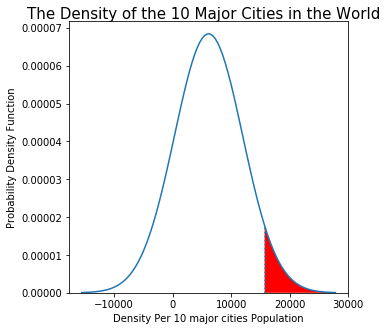

In [78]:
dist = stats.norm(6154.5,5828.712246285624)
fig = plt.figure(figsize=(5,5))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([15741.878478759372, 15741.878478759372],[0, dist.pdf(15741.878478759372)], linestyle='dotted', color='#1f77b4')
plt.ylim(bottom=0)
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.xlabel('Density Per 10 major cities Population')
plt.ylabel('Probability Density Function')
fig.suptitle('The Density of the 10 Major Cities in the World', fontsize=15, y=0.92)

I reject the null hypothesis because India falls within the rejected region. 